In [ ]:
# Directorio donde se encuentra el dataset
root_path = ''

In [ ]:
# Imports
import csv
import numpy as np
import librosa
import matplotlib.pyplot as plt

Longitud del vector de muestras del archivo: 379265




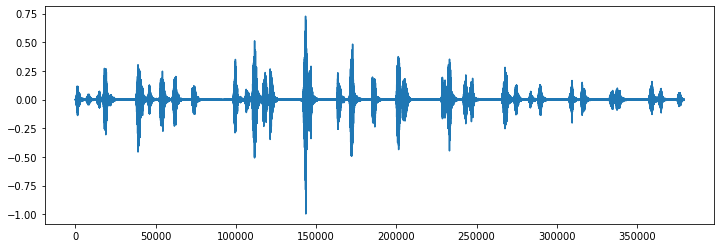

In [ ]:
# Lectura y visualización de un archivo de audio

file = root_path + "train/dog/dog_barking_0.wav"

audio_data, sample_rate = librosa.load(file)

print("Longitud del vector de muestras del archivo: " + str(len(audio_data)) + "\n\n")

fig = plt.figure(figsize=(12, 4))
plt.plot(audio_data)
plt.show()

In [ ]:
# Lectura del dataset completo de train
trainfile = csv.reader(open(root_path + "train.csv"), delimiter='\t')
trainrows = [[c for c in row] for row in trainfile]
row_count_train = len(trainrows)
T_train = [int(c[0]) for c in trainrows]
wavfiles = np.array(trainrows)[:, 1]

In [ ]:
# Ensayo 1
# Creación del dataset dividiendo cada archivo de audio en distintas "porciones" de igual longitud

longitud_porcion = 10000

X = []  ; Y = []
for i in range(len(wavfiles)):
    audio_data, sample_rate = librosa.load(root_path + wavfiles[i])

    longitud = len(audio_data)
    comienzo = 0
    while (comienzo+longitud_porcion) < longitud:
      data = audio_data[comienzo:(comienzo+longitud_porcion)]
      comienzo+= longitud_porcion

      X.append(data)
      Y.append(T_train[i])
      
X = np.array(X)
Y = np.array(Y)
input_length = X.shape[1]

In [ ]:
# Ensayo 2
# Creación del dataset utilizando características espectrales de las señales de audio

# Codificación a utilizar (puede probar con una de ellas, un subconjunto o todas a la vez)

codificacion = []
#codificacion.append("mfcc")    # Cepstral coefficients
#codificacion.append("stft")    # Short-Time Fourier Transform and Chroma Features
#codificacion.append("mels")    # Melspectrogram
#codificacion.append("cont")    # Spectral contrast
#codificacion.append("tonn")    # Tonnetz
#codificacion.append("cent")    # Spectral centroids
#codificacion.append("band")    # Spectral bandwidth
#codificacion.append("roll")    # Spectral rolloff
codificacion.append("zcrt")    # Zero crossing rate

X = None ; Y = []
for i in range(len(wavfiles)):
    audio_data, sample_rate = librosa.load(root_path + wavfiles[i])
    stft = np.abs(librosa.stft(audio_data))

    features = None

    if "mfcc" in codificacion:
      a = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "stft" in codificacion:
      a = librosa.feature.chroma_stft(S=stft, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "mels" in codificacion:
      a = librosa.feature.melspectrogram(audio_data, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "cont" in codificacion:
      a = librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "tonn" in codificacion:
      a = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio_data, ), sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "cent" in codificacion:
      a = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "band" in codificacion:
      a = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "roll" in codificacion:
      a = librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    if "zcrt" in codificacion:
      a = librosa.feature.zero_crossing_rate(audio_data).T
      if features is None:
        features = a
      else:
        features = np.concatenate((features, a), axis=1)

    for j in range(features.shape[0]):
      if X is None:
        X = features
      else:
        X = np.concatenate( (X, features[j,:][np.newaxis]) , axis = 0)
      Y.append(T_train[i])
      
Y = np.array(Y)
input_length = X.shape[1]

In [ ]:
# Ensayo 3
# Creación del dataset utilizando el promedio de las características espectrales de las señales de audio.
# Simplifica la tarea de testing, ya que se genera un único vector de features por archivo.

X = [] ; Y = []
for i in range(len(wavfiles)):
    audio_data, sample_rate = librosa.load(root_path + wavfiles[i])
    stft = np.abs(librosa.stft(audio_data))

    features = []

    if "mfcc" in codificacion:
      a = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "stft" in codificacion:
      a = librosa.feature.chroma_stft(S=stft, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "mels" in codificacion:
      a = librosa.feature.melspectrogram(audio_data, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "cont" in codificacion:
      a = librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "tonn" in codificacion:
      a = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio_data, ), sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "cent" in codificacion:
      a = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "band" in codificacion:
      a = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "roll" in codificacion:
      a = librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    if "zcrt" in codificacion:
      a = librosa.feature.zero_crossing_rate(audio_data).T
      if features is None:
        features = np.mean(a, axis=0)
      else:
        features = np.concatenate( (features, np.mean(a, axis=0)) )

    X.append(features)    
    Y.append(T_train[i])
      
X = np.array(X)
Y = np.array(Y)
input_length = X.shape[1]